# Ontology Visualization with Python Libraries

Ontology:

*   Definition: An ontology is a formal representation of knowledge that defines concepts, their relationships, and properties within a specific domain.
*   Purpose: To represent and organize information in a structured manner for various applications, such as data integration, knowledge management, and semantic web development.


RDFlib:

*   Definition: RDFlib is a Python library for working with RDF (Resource Description Framework) data. It provides tools for parsing, querying, and manipulating RDF data.
*   Purpose: To load and process RDF data, including ontologies, in Python applications.


NetworkX:

*   Definition: NetworkX is a Python library used for creating, analyzing, and visualizing complex networks and graphs.
*   Purpose: To represent ontological relationships and visualize them as graphs, making it easier to understand and analyze the structure of the ontology.


pyvis:


*   Definition: Pyvis is a Python library that provides an interface to create interactive network visualizations using JavaScript-based libraries like vis.js.
*   Purpose: To create interactive and visually appealing visualizations of ontologies represented as graphs, enabling users to explore and understand the ontology's structure.


Load Ontology File, Parse, and Print Graph with Classes and Attributes:


*   Description: This task involves loading an ontology file (typically in RDF format), parsing its contents using RDFlib, and then using NetworkX and pyvis to create a graph representation of the ontology. This graph should display classes (concepts) as nodes and attributes (properties) as edges, allowing for a clear visualization of the ontology's structure.


This header and bullet points provide an overview of the main concepts related to ontology visualization using Python libraries like RDFlib, NetworkX, and pyvis.

In [ ]:
# import below files:

#1 Wear4PDmoveOnto_v2.owl
#2 PMDO_v1.0.owl
#3 saref4envi.rdf
#4 sosa.owl

In [ ]:
!pip install rdflib networkx pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 531.9/531.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.6 MB/s eta 0:00:00


In [ ]:
from rdflib import Graph

g = Graph()
g.parse("Wear4PDmoveOnto_v2.owl")

classes = set()
data_properties = set()

for s, p, o in g:
    if str(p).endswith("#type") and str(o).endswith("#Class"):
        classes.add(str(s))
    elif str(p).endswith("#type") and str(o).endswith("#DatatypeProperty"):
        data_properties.add(str(s))

# Print each item on a new line
print('\n'.join(data_properties))

http://w3id.org/Wear4PDmove/onto#ageOfPatient
http://w3id.org/Wear4PDmove/onto#sendNotification
http://w3id.org/Wear4PDmove/onto#hasFatigue
http://w3id.org/Wear4PDmove/onto#bodyMassIndex
http://w3id.org/Wear4PDmove/onto#hasBradykinisiaOfUpperLimp
http://w3id.org/Wear4PDmove/onto#diseaseDuration
http://w3id.org/Wear4PDmove/onto#heartRate
http://w3id.org/Wear4PDmove/onto#hasPosturalInstability
http://w3id.org/Wear4PDmove/onto#hasTremor
http://w3id.org/Wear4PDmove/onto#obsAfterDosing
http://w3id.org/Wear4PDmove/onto#hasDysphagia
https://dahcc.idlab.ugent.be/Ontology/SensorsAndWearables/hasAxis
http://w3id.org/Wear4PDmove/onto#hasFreezingOfGait
http://w3id.org/Wear4PDmove/onto#scoreUPDRS
http://w3id.org/Wear4PDmove/onto#hasRigidity
http://w3id.org/Wear4PDmove/onto#hasDepression
http://w3id.org/Wear4PDmove/onto#hasSleepDisturbances
http://w3id.org/Wear4PDmove/onto#levelHoehnYahrStage
http://w3id.org/Wear4PDmove/onto#hasAkinesia
http://w3id.org/Wear4PDmove/onto#hasAnxiety


In [ ]:
import networkx as nx

G = nx.DiGraph()

for c in classes:
    G.add_node(c.split("#")[-1])

In [ ]:
for s, p, o in g:
    if str(p).endswith("#domain"):
        domain = str(o).split("#")[-1]
        if domain in G.nodes():
            for s1, p1, o1 in g:
                if str(p1).endswith("#range") and str(o1) in data_properties:
                    G.add_edge(domain, str(o1).split("#")[-1])

In [ ]:
from pyvis.network import Network

net = Network(height="750px", width="100%", directed=True, notebook=True)
net.from_nx(G)
net.show("1_classes.html")

1_classes.html


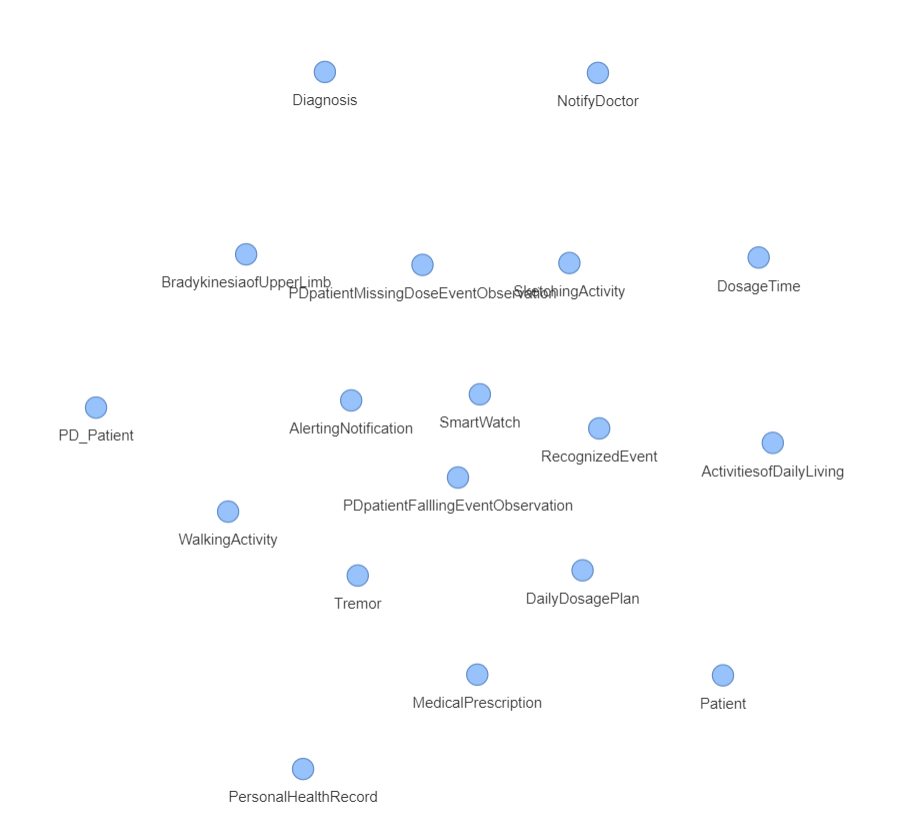

In [ ]:
from rdflib import Graph
from pyvis.network import Network
from rdflib import RDFS
from rdflib.namespace import OWL


g = Graph()
g.parse("Wear4PDmoveOnto_v2.owl")

net = Network(notebook=True,cdn_resources='in_line')
net.show_buttons(filter_=['physics'])

for s, p, o in g.triples((None, RDFS.subClassOf, None)):
    net.add_node(str(s), label=str(s).split("#")[-1], shape="box")

for s, p, o in g.triples((None, None, None)):
    if p == OWL.ObjectProperty or p == OWL.DatatypeProperty:
        net.add_edge(str(s), str(o), label=str(p).split("#")[-1])

net.show("2_classes_with_filters.html")

2_classes_with_filters.html


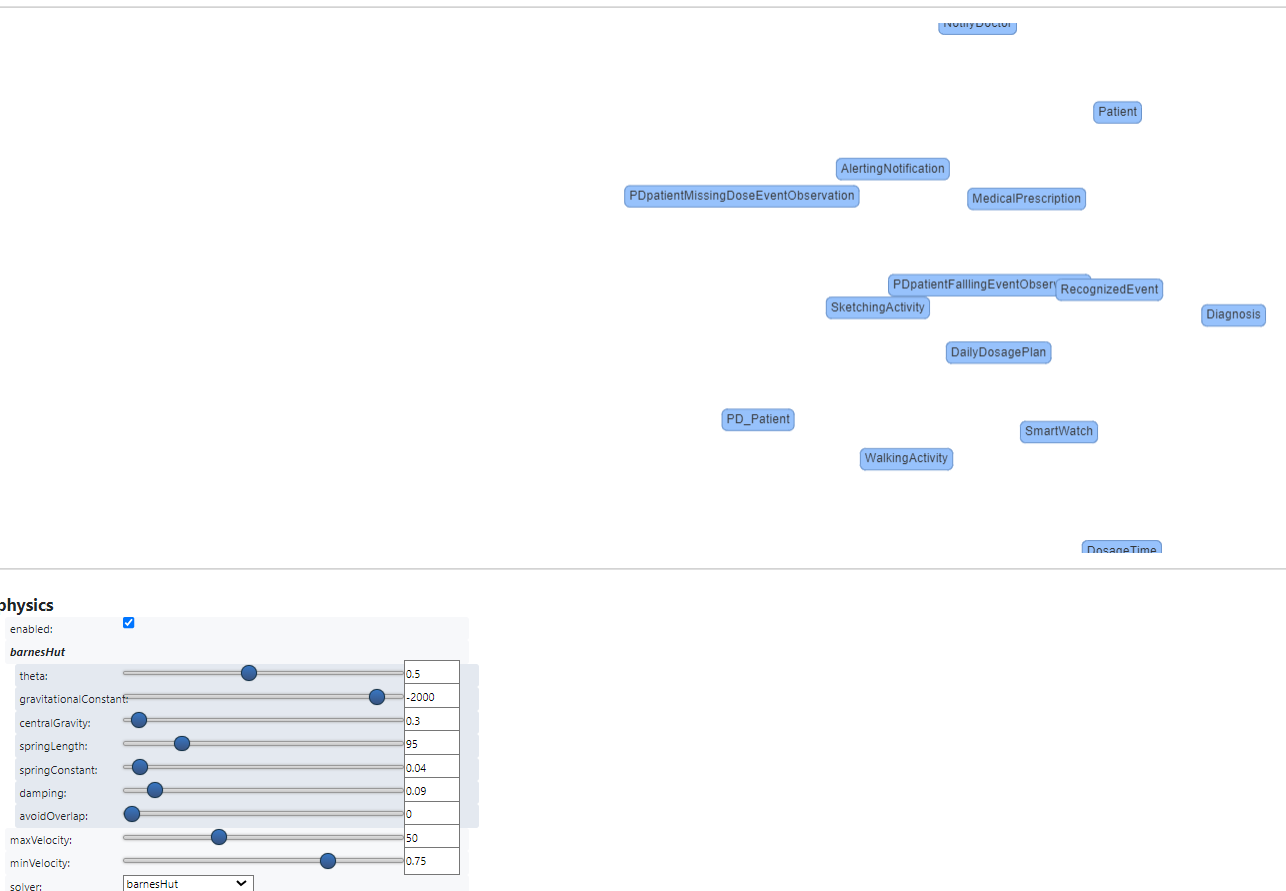

In [ ]:
from rdflib import Graph
from rdflib.namespace import RDF, RDFS, OWL
from pyvis.network import Network

# Load ontology file
g = Graph()
g.parse("Wear4PDmoveOnto_v2.owl")

# Initialize pyvis network
net = Network(height="750px", width="100%", bgcolor="#222222", font_color="white",notebook=True)

# Create dictionary of nodes (classes)
classes = {}
for s, p, o in g.triples((None, RDF.type, OWL.Class)):
    classes[str(s)] = str(s).split("#")[1]
    net.add_node(classes[str(s)], shape="circle")

# Add properties as nodes (rectangles)
for s, p, o in g.triples((None, None, None)):
    if (str(p) == "http://www.w3.org/2002/07/owl#ObjectProperty") or (str(p) == "http://www.w3.org/2002/07/owl#DatatypeProperty"):
        if str(p) not in classes.keys():
            net.add_edge(str(p).split("#")[1], shape="rect")


# Create edges (connections) between nodes
for s, p, o in g:
    if str(p) != RDF.type:
        if str(s) in classes.keys():
            if str(o) in classes.keys():
                net.add_edge(classes[str(s)], classes[str(o)], title=str(p).split("#")[1])
            elif str(o) in classes.values():
                net.add_edge(classes[str(s)], str(o), title=str(p).split("#")[1])
        elif str(s) in classes.values():
            if str(o) in classes.keys():
                net.add_edge(str(s), classes[str(o)], title=str(p).split("#")[1])
            elif str(o) in classes.values():
                net.add_edge(str(s), str(o), title=str(p).split("#")[1])

# Save and show the network
net.show("3_knowledge_graph_in_black_bg.html")


3_knowledge_graph_in_black_bg.html


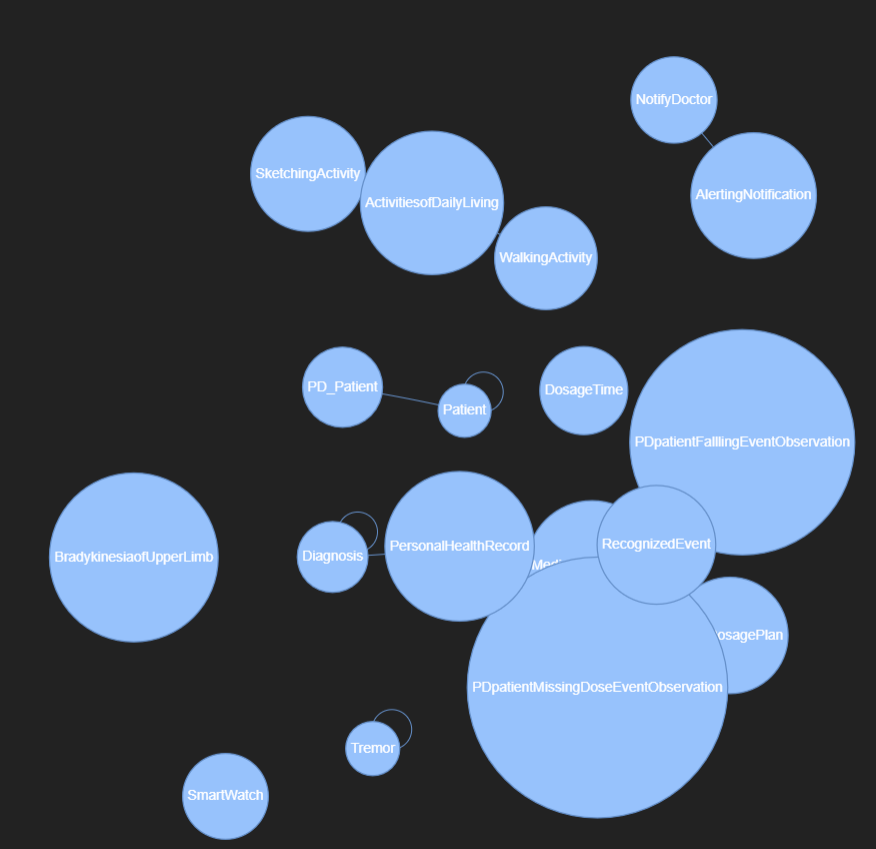

In [ ]:
from pyvis.network import Network
from rdflib import Graph

g = Graph()
g.parse('Wear4PDmoveOnto_v2.owl')

net = Network(notebook=True)

for s, p, o in g:
    # Add classes as nodes
    if p == RDF.type and o == OWL.Class:
        net.add_node(s.split('#')[-1], label=s.split('#')[-1], shape='circle')
    # Add object properties and data properties as nodes
    elif p == RDF.type and (o == OWL.ObjectProperty or o == OWL.DatatypeProperty):
        net.add_node(s.split('#')[-1], label=s.split('#')[-1], shape='rect')
    # Add edges between classes and properties
    elif p == RDFS.domain and o == OWL.Class:
        if s.split('#')[-1] in net.nodes:  # Check if node exists in the graph
            net.add_edge(s.split('#')[-1], p.split('#')[-1], label='domain')
    elif p == RDFS.range and o == OWL.Class:
        if s.split('#')[-1] in net.nodes:  # Check if node exists in the graph
            net.add_edge(s.split('#')[-1], p.split('#')[-1], label='range')
    # Add edges between properties
    elif p == RDF.type and o == OWL.ObjectProperty:
        if s.split('#')[-1] in net.nodes and o.split('#')[-1] in net.nodes:  # Check if nodes exist in the graph
            net.add_edge(s.split('#')[-1], o.split('#')[-1], label='is_a')
    elif p == RDF.type and o == OWL.DatatypeProperty:
        if s.split('#')[-1] in net.nodes and o.split('#')[-1] in net.nodes:  # Check if nodes exist in the graph
            net.add_edge(s.split('#')[-1], o.split('#')[-1], label='is_a')

net.show('4_graph_with_classes_and_attr.html')


4_graph_with_classes_and_attr.html


In [ ]:
from pyvis.network import Network
from rdflib import Graph, RDF, RDFS, OWL

g = Graph()
g.parse('Wear4PDmoveOnto_v2.owl')

net = Network(notebook=True)
net.show_buttons(filter_=['physics'])

for s, p, o in g:
    # Add classes as nodes
    if p == RDF.type and o == OWL.Class:
        net.add_node(s.split('#')[-1], label=s.split('#')[-1], shape='circle')
    # Add object properties and data properties as nodes
    elif p == RDF.type and (o == OWL.ObjectProperty or o == OWL.DatatypeProperty):
        net.add_node(s.split('#')[-1], label=s.split('#')[-1], shape='rect')
    # Add edges between classes and properties
    elif p == RDFS.domain and o == OWL.Class:
        if s.split('#')[-1] in net.nodes:  # Check if node exists in the graph
            net.add_edge(s.split('#')[-1], p.split('#')[-1], label='domain')
    elif p == RDFS.range and o == OWL.Class:
        if s.split('#')[-1] in net.nodes:  # Check if node exists in the graph
            net.add_edge(s.split('#')[-1], p.split('#')[-1], label='range')
    # Add edges between properties
    elif p == RDF.type and o == OWL.ObjectProperty:
        if s.split('#')[-1] in net.nodes and o.split('#')[-1] in net.nodes:  # Check if nodes exist in the graph
            net.add_edge(s.split('#')[-1], o.split('#')[-1], label='is_a')
    elif p == RDF.type and o == OWL.DatatypeProperty:
        if s.split('#')[-1] in net.nodes and o.split('#')[-1] in net.nodes:  # Check if nodes exist in the graph
            net.add_edge(s.split('#')[-1], o.split('#')[-1], label='is_a')



net.show('4_graph_with_classes_and_attr.html')


4_graph_with_classes_and_attr.html


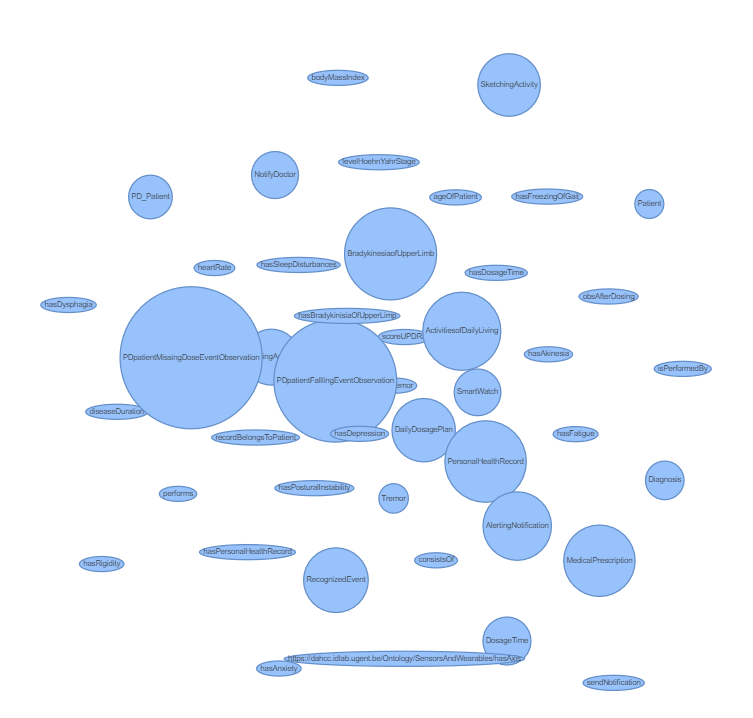

# Ontology Management with Owlready2

Ontology Owlready2:


*   Description: Owlready2 is a Python library for ontology-oriented programming, allowing developers to work with OWL ontologies seamlessly in Python.
*   Purpose: To provide a Pythonic way to interact with OWL ontologies and perform ontology-related tasks efficiently.


Specify the Import Relationship Between the Ontologies:

*   Description: In ontology development, the "import" relationship is used to link one ontology to another, allowing for the reuse of classes, properties, and other elements. Specifying import relationships is crucial for modular ontology design and ontology integration.
*   Purpose: To establish connections between ontologies, enabling the sharing and utilization of ontology components across different knowledge domains or applications.

In [ ]:
!pip install owlready2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.3/27.3 MB 36.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for owlready2: filename=owlready2-0.45-cp310-cp310-linux_x86_64.whl size=24077385 sha256=58428ea81693e199f5f7dac1da23d6f6ea8d7ec1a3ef0f1b544093e5cf3f1f97
  Stored in directory: /root/.cache/pip/wheels/5c/f4/9d/249b1671d391e3feddd443c7d0eb79a732afabc9f370591271
Successfully built owlready2


In [ ]:
from owlready2 import get_ontology

# Load the PMDO and SAREF ontology
pmdo_ontology = get_ontology("PMDO_v1.0.owl").load()
saref_ontology = get_ontology("saref4envi.rdf").load()


core_ontology = get_ontology("Wear4PDmoveOnto_v2.owl")
core_ontology.load()

# Specify the import relationship between the ontologies
core_ontology.imported_ontologies.append(pmdo_ontology)
core_ontology.imported_ontologies.append(saref_ontology)


print("classes (concepts):")
print("\n".join(str(c) for c in core_ontology.classes()))
print("\n" * 2)
print("properties (roles):")
print("\n".join(str(p) for p in core_ontology.properties()))
print("\n" * 2)
print("individuals:")
print("\n".join(str(i) for i in core_ontology.individuals()))
print("\n" * 2)
print("hasBradykinisiaOfUpperLimp (Get relations):")
list(core_ontology.hasBradykinisiaOfUpperLimp.get_relations())

classes (concepts):
MDO.Tremor
MDO.ActivitiesofDailyLiving
PMDO_v1.0.BradykinesiaofUpperLimb
Wear4PDmoveOnto_v2.PersonalHealthRecord
Wear4PDmoveOnto_v2.DailyDosagePlan
Wear4PDmoveOnto_v2.DosageTime
Wear4PDmoveOnto_v2.Patient
Wear4PDmoveOnto_v2.AlertingNotification
Wear4PDmoveOnto_v2.MedicalPrescription
Wear4PDmoveOnto_v2.Diagnosis
Wear4PDmoveOnto_v2.NotifyDoctor
Wear4PDmoveOnto_v2.PD_Patient
Wear4PDmoveOnto_v2.PDpatientFalllingEventObservation
Wear4PDmoveOnto_v2.RecognizedEvent
Wear4PDmoveOnto_v2.PDpatientMissingDoseEventObservation
Wear4PDmoveOnto_v2.SketchingActivity
Wear4PDmoveOnto_v2.SmartWatch
Wear4PDmoveOnto_v2.WalkingActivity



properties (roles):
Wear4PDmoveOnto_v2.ageOfPatient
Wear4PDmoveOnto_v2.bodyMassIndex
Wear4PDmoveOnto_v2.diseaseDuration
Wear4PDmoveOnto_v2.hasAkinesia
Wear4PDmoveOnto_v2.hasAnxiety
Wear4PDmoveOnto_v2.hasBradykinisiaOfUpperLimp
Wear4PDmoveOnto_v2.hasDepression
Wear4PDmoveOnto_v2.hasDysphagia
Wear4PDmoveOnto_v2.hasFatigue
Wear4PDmoveOnto_v2.hasFreezingOfGa

[(Wear4PDmoveOnto_v2.PD-patient-Observation-101, False),
 (Wear4PDmoveOnto_v2.PD-patient-Observation-102, False),
 (Wear4PDmoveOnto_v2.PD-patient-Observation-103, True),
 (Wear4PDmoveOnto_v2.PD-patient-Observation-201, False),
 (Wear4PDmoveOnto_v2.PD-patient-Observation-202, False),
 (Wear4PDmoveOnto_v2.PD-patient-Observation-203, True),
 (Wear4PDmoveOnto_v2.PD-patient-Observation-301, False),
 (Wear4PDmoveOnto_v2.PD-patient-Observation-302, False),
 (Wear4PDmoveOnto_v2.PD-patient-Observation-303, False)]

In [ ]:
# hasBradykinisiaOfUpperLimp
rels = list(core_ontology.hasBradykinisiaOfUpperLimp.get_relations())
print(rels)

# hasTremor
rels = list(core_ontology.hasTremor.get_relations())
print(rels)

[(Wear4PDmoveOnto_v2.PD-patient-Observation-101, False), (Wear4PDmoveOnto_v2.PD-patient-Observation-102, False), (Wear4PDmoveOnto_v2.PD-patient-Observation-103, True), (Wear4PDmoveOnto_v2.PD-patient-Observation-201, False), (Wear4PDmoveOnto_v2.PD-patient-Observation-202, False), (Wear4PDmoveOnto_v2.PD-patient-Observation-203, True), (Wear4PDmoveOnto_v2.PD-patient-Observation-301, False), (Wear4PDmoveOnto_v2.PD-patient-Observation-302, False), (Wear4PDmoveOnto_v2.PD-patient-Observation-303, False)]
[(Wear4PDmoveOnto_v2.PD-patient-Observation-101, False), (Wear4PDmoveOnto_v2.PD-patient-Observation-102, False), (Wear4PDmoveOnto_v2.PD-patient-Observation-103, True), (Wear4PDmoveOnto_v2.PD-patient-Observation-201, False), (Wear4PDmoveOnto_v2.PD-patient-Observation-202, False), (Wear4PDmoveOnto_v2.PD-patient-Observation-203, True), (Wear4PDmoveOnto_v2.PD-patient-Observation-301, False), (Wear4PDmoveOnto_v2.PD-patient-Observation-302, False), (Wear4PDmoveOnto_v2.PD-patient-Observation-303, Fa

In [ ]:
for r in rels:
  print(type(r))
  print(f"n.{r[0]}.hasBradykinisiaOfUpperLimp: n.{r[1]}")

<class 'tuple'>
n.Wear4PDmoveOnto_v2.PD-patient-Observation-101.hasBradykinisiaOfUpperLimp: n.False
<class 'tuple'>
n.Wear4PDmoveOnto_v2.PD-patient-Observation-102.hasBradykinisiaOfUpperLimp: n.False
<class 'tuple'>
n.Wear4PDmoveOnto_v2.PD-patient-Observation-103.hasBradykinisiaOfUpperLimp: n.True
<class 'tuple'>
n.Wear4PDmoveOnto_v2.PD-patient-Observation-201.hasBradykinisiaOfUpperLimp: n.False
<class 'tuple'>
n.Wear4PDmoveOnto_v2.PD-patient-Observation-202.hasBradykinisiaOfUpperLimp: n.False
<class 'tuple'>
n.Wear4PDmoveOnto_v2.PD-patient-Observation-203.hasBradykinisiaOfUpperLimp: n.True
<class 'tuple'>
n.Wear4PDmoveOnto_v2.PD-patient-Observation-301.hasBradykinisiaOfUpperLimp: n.False
<class 'tuple'>
n.Wear4PDmoveOnto_v2.PD-patient-Observation-302.hasBradykinisiaOfUpperLimp: n.False
<class 'tuple'>
n.Wear4PDmoveOnto_v2.PD-patient-Observation-303.hasBradykinisiaOfUpperLimp: n.False


# Working with RDF Data and Visualization in Python

RDFlib:

RDFlib is a Python library for working with RDF (Resource Description Framework) data. It provides tools to manipulate and query RDF data, such as finding all triples, classes, and properties in the graph.


Finding Triples, Classes, and Properties:

*   Description: Analyzing RDF data often involves identifying triples (subject-predicate-object relationships), classes (concepts), and properties (relationships).
*   Purpose: To gain insights into the structure and content of RDF graphs for various applications, including semantic web development and data integration.


pyvis and HTML Visualization:

pyvis is a Python library that facilitates the creation of interactive network visualizations, including knowledge graphs. It enables the generation of HTML files that display knowledge graphs visually.

Creating Interactive Windows and SPARQL Queries:

*   Description: Interactive windows and SPARQL queries provide a user-friendly way to explore and query RDF data.
*   Usage: To interactively query and analyze RDF data, visualize the results, and facilitate knowledge discovery.
Code Snippet for Interactive Usage:

The provided code snippet demonstrates how to create an interactive window for running SPARQL queries in Jupyter Notebook using RDFlib, ipywidgets, and IPython.display. This allows users to interactively work with RDF data in a Jupyter environment.

In [ ]:
# install required libraries -- run only one time for locally env & refresh runtime because in other way show problem below scripts
!pip install rdflib==6.3.2
!pip install SPARQLWrapper==2.0.0

In [ ]:
from rdflib import Graph

# Create an RDF graph
g = Graph()

# Load RDF data from .owl file
g.parse("Wear4PDmoveOnto_v2.owl", format="xml")
print("success import")

success import


In [ ]:
from rdflib import Graph, Namespace, Literal
from rdflib.plugins.sparql import prepareQuery
from rdflib import RDF

# Define a SPARQL query
query = prepareQuery("""
    PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
    PREFIX owl: <http://www.w3.org/2002/07/owl#>
    PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
    PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
    PREFIX w4pd: <http://i-lab.aegean.gr/ontologies/Wear4PDmoveOnto#>
    PREFIX saref: <https://saref.etsi.org/core/>
    PREFIX sosa: <http://www.w3.org/ns/sosa/>

    SELECT ?activity ?patient
    WHERE {
    ?patient rdf:type w4pd:PD_Patient;
        w4pd:performs ?activity.
    }
""", initNs={"rdf": RDF})

# Execute the SPARQL query on the RDF graph
results = g.query(query)

# Iterate through the query results and print them
for row in results:
    print(row)


In [ ]:
import rdflib
import pandas as pd

# Create an RDF graph and parse your RDF data
g = rdflib.Graph()
g.parse("Wear4PDmoveOnto_v2.owl", format="xml")

# Define your namespaces
namespaces = {
    'rdf': rdflib.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#'),
    'owl': rdflib.URIRef('http://www.w3.org/2002/07/owl#'),
    'onto': rdflib.URIRef('http://w3id.org/Wear4PDmove/onto#'),
    'core': rdflib.URIRef('https://saref.etsi.org/core/')
}

# Bind the namespaces to the graph
for prefix, uri in namespaces.items():
    g.bind(prefix, uri)

# Define the individual URIs you want to access
individual_iris = [
    rdflib.URIRef('http://w3id.org/Wear4PDmove/onto#PD-patient-Observation-101'),
    rdflib.URIRef('http://w3id.org/Wear4PDmove/onto#PD-patient-Observation-102'),
    rdflib.URIRef('http://w3id.org/Wear4PDmove/onto#PD-patient-Observation-103'),
    rdflib.URIRef('http://w3id.org/Wear4PDmove/onto#PD-patient-Observation-201'),
    rdflib.URIRef('http://w3id.org/Wear4PDmove/onto#PD-patient-Observation-202'),
    rdflib.URIRef('http://w3id.org/Wear4PDmove/onto#PD-patient-Observation-203'),
    rdflib.URIRef('http://w3id.org/Wear4PDmove/onto#PD-patient-Observation-301'),
    rdflib.URIRef('http://w3id.org/Wear4PDmove/onto#PD-patient-Observation-302'),
    rdflib.URIRef('http://w3id.org/Wear4PDmove/onto#PD-patient-Observation-303'),
    # Add more individual URIs as needed
]

# Create a list to store DataFrames for each observation
observation_dfs = []

for individual_iri in individual_iris:
    # Define the query to retrieve relevant data for the specific individual
    query = f"""
        SELECT ?timestamp ?bradykinisia ?tremor
        WHERE {{
            <{individual_iri}> core:hasTimestamp ?timestamp .
            <{individual_iri}> onto:hasBradykinisiaOfUpperLimp ?bradykinisia .
            <{individual_iri}> onto:hasTremor ?tremor .
        }}
        ORDER BY ?timestamp
    """

    # Execute the SPARQL query
    results = g.query(query)

    # Create a Pandas DataFrame to store the results
    data = []
    for row in results:
        timestamp = row[0]
        bradykinisia = bool(row[1].value) if row[1].datatype == rdflib.XSD.boolean else None
        tremor = bool(row[2].value) if row[2].datatype == rdflib.XSD.boolean else None
        data.append([timestamp, bradykinisia, tremor, individual_iri])  # Add the individual URI
    df = pd.DataFrame(data, columns=['Timestamp', 'hasBradykinisia', 'hasTremor', 'Observation_URI'])

    # Remove rows with None values (where datatype is not XSD.boolean)
    df = df.dropna()

    # Sort the DataFrame by timestamp
    df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y-%m-%dT%H:%M:%S.%f%z')

    observation_dfs.append(df)

# Concatenate all observation DataFrames into a single DataFrame
combined_df = pd.concat(observation_dfs)

# Set send_notification_medium_alert and send_notification_high_alert based on your logic
combined_df['send_notification_medium_alert'] = combined_df.apply(
    lambda row: row['hasBradykinisia'] | row['hasTremor'], axis=1
)

combined_df['send_notification_high_alert'] = combined_df.apply(
    lambda row: row['hasBradykinisia'] & row['hasTremor'], axis=1
)

# Adjust the values as per your condition
combined_df.loc[combined_df['hasBradykinisia'] & combined_df['hasTremor'], 'send_notification_medium_alert'] = False

# Print the combined DataFrame
print(combined_df)

# You can perform further analysis or processing on the combined_df if needed.
# Save the combined_df to a CSV file
combined_df.to_csv('combined_data.csv', index=False)


                         Timestamp  hasBradykinisia  hasTremor  \
0 2022-08-04 12:42:12.150000+00:00            False      False   
0 2022-08-04 12:43:12.150000+00:00            False      False   
0 2022-08-04 12:44:12.150000+00:00             True       True   
0 2022-08-04 12:42:12.150000+00:00            False      False   
0 2022-08-04 12:43:12.150000+00:00            False      False   
0 2022-08-04 12:44:12.150000+00:00             True       True   
0 2022-08-04 12:42:12.150000+00:00            False      False   
0 2022-08-04 12:43:12.150000+00:00            False      False   
0 2022-08-04 12:44:12.150000+00:00            False      False   

                                     Observation_URI  \
0  http://w3id.org/Wear4PDmove/onto#PD-patient-Ob...   
0  http://w3id.org/Wear4PDmove/onto#PD-patient-Ob...   
0  http://w3id.org/Wear4PDmove/onto#PD-patient-Ob...   
0  http://w3id.org/Wear4PDmove/onto#PD-patient-Ob...   
0  http://w3id.org/Wear4PDmove/onto#PD-patient-Ob...   
0  

In [ ]:
from rdflib import Graph, RDF, OWL

# Find all the triples in the graph
for subj, pred, obj in g:
    print((subj, pred, obj))

# Find all the classes in the graph
for subject in g.subjects(predicate=RDF.type, object=OWL.Class):
    print(subject)

# Find all the properties in the graph
for subject in g.subjects(predicate=RDF.type, object=OWL.ObjectProperty):
    print(subject)

(rdflib.term.URIRef('http://w3id.org/Wear4PDmove/onto#MedicalPrescription'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://www.w3.org/2002/07/owl#Class'))
(rdflib.term.URIRef('http://w3id.org/Wear4PDmove/onto#PD-patient-Observation-102'), rdflib.term.URIRef('http://w3id.org/Wear4PDmove/onto#hasBradykinisiaOfUpperLimp'), rdflib.term.Literal('false', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#boolean')))
(rdflib.term.URIRef('http://w3id.org/Wear4PDmove/onto#Acc22-sensor'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#label'), rdflib.term.Literal('Samsung Sensor Accelerometer 22'))
(rdflib.term.URIRef('http://w3id.org/Wear4PDmove/onto#hasDysphagia'), rdflib.term.URIRef('http://www.w3.org/2000/01/rdf-schema#subPropertyOf'), rdflib.term.URIRef('http://www.w3.org/2002/07/owl#topDataProperty'))
(rdflib.term.URIRef('http://w3id.org/Wear4PDmove/onto#PD-patient-Observation-201'), rdflib.term.URIRef('http://w3id.or

In [ ]:
!pip install pyvis

In [ ]:
import pyvis.network as net
from rdflib import Graph

# Load the RDF graph from a file or URL
g = Graph().parse("Wear4PDmoveOnto_v2.owl")

# Create a Pyvis network object
netw = net.Network(width="100%", height="800px", notebook=True)

# Add nodes and edges to the network object
for s, p, o in g:
    netw.add_node(str(s), title=str(s))
    netw.add_node(str(o), title=str(o))
    netw.add_edge(str(s), str(o), label=str(p))

# Show the network
netw.show("ontology.html")

# Open the HTML file in a web browser
import webbrowser
webbrowser.open_new_tab("ontology.html")


ontology.html


False

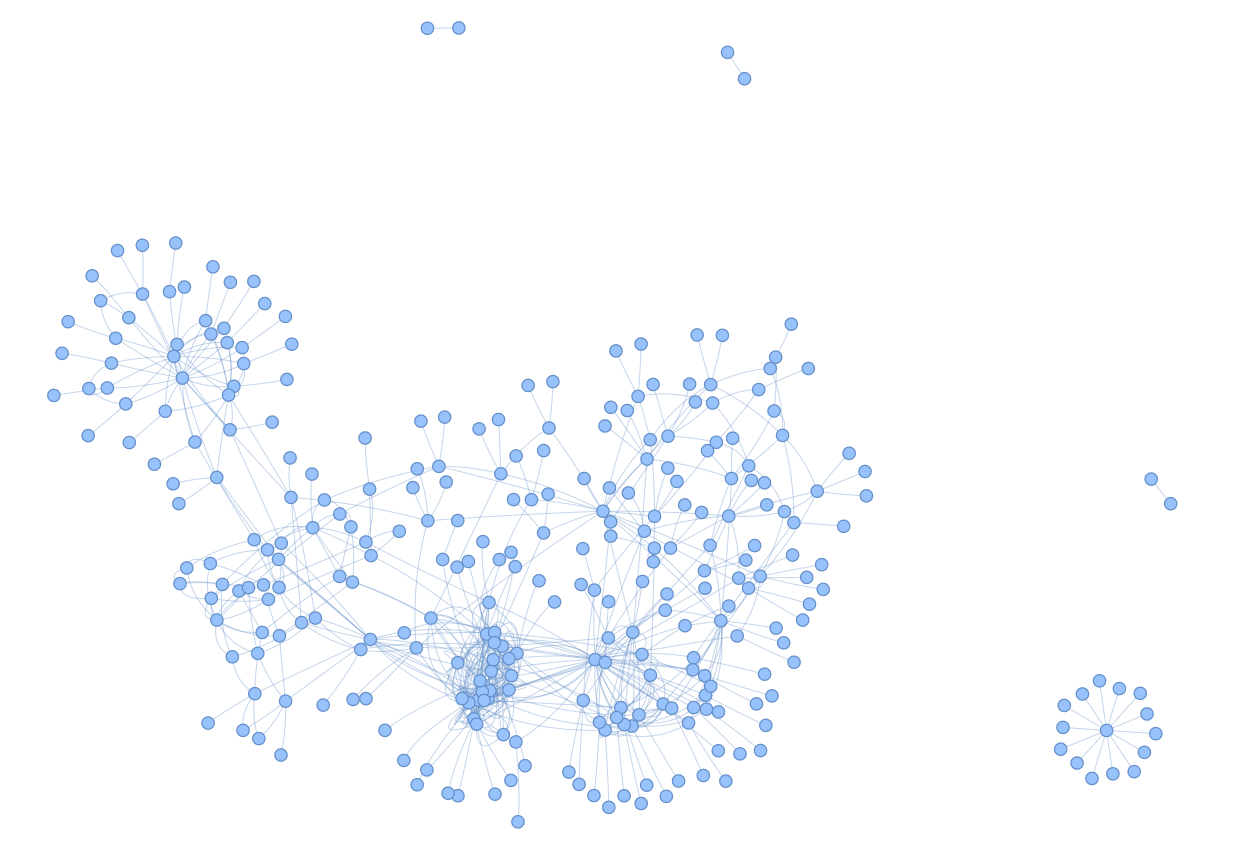

In [ ]:
# Without apply styling to center align columns (default settings)
from rdflib import Graph
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# Load the ontology file into an rdflib.Graph object
g = Graph().parse("Wear4PDmoveOnto_v2.owl")

# Create a text input widget for the SPARQL query
query_input = widgets.Textarea(
    value='',
    placeholder='Enter SPARQL query',
    description='Query:',
    layout=widgets.Layout(width='100%')
)

# Create a button widget to execute the SPARQL query
query_button = widgets.Button(
    description='Run Query',
    layout=widgets.Layout(width='20%')
)

# Create an output widget to display the query results
query_output = widgets.Output()

# Define a function to execute the SPARQL query and convert the results to a DataFrame with explicit column names
def run_query(_):
    # Get the SPARQL query text from the input widget
    query = query_input.value

    # Execute the query on the graph and get the results as a list of tuples
    results = g.query(query)

    # Convert the results to a Pandas DataFrame with explicit column names
    df = pd.DataFrame([(str(row[0]), str(row[1]), str(row[2])) for row in results], columns=['Subject', 'Predicate', 'Object'])

    # Display the DataFrame in the output widget
    with query_output:
        query_output.clear_output()
        display(df)

# Attach the function to the button's click event
query_button.on_click(run_query)

# Display the input widget, button widget, and output widget
display(query_input, query_button, query_output)


Textarea(value='', description='Query:', layout=Layout(width='100%'), placeholder='Enter SPARQL query')

Button(description='Run Query', layout=Layout(width='20%'), style=ButtonStyle())

Output()

In [ ]:
from rdflib import Graph
import ipywidgets as widgets
from IPython.display import display
import pandas as pd

# Load the ontology file into an rdflib.Graph object
g = Graph().parse("Wear4PDmoveOnto_v2.owl")

# Create a text input widget for the SPARQL query
query_input = widgets.Textarea(
    value='',
    placeholder='Enter SPARQL query',
    description='Query:',
    layout=widgets.Layout(width='100%')
)

# Create a button widget to execute the SPARQL query
query_button = widgets.Button(
    description='Run Query',
    layout=widgets.Layout(width='20%')
)

# Create an output widget to display the query results
query_output = widgets.Output()

# Define a function to execute the SPARQL query and convert the results to a DataFrame with explicit column names
def run_query(_):
    # Get the SPARQL query text from the input widget
    query = query_input.value

    # Execute the query on the graph and get the results as a list of tuples
    results = g.query(query)

    # Convert the results to a Pandas DataFrame with explicit column names
    df = pd.DataFrame([(str(row[0]), str(row[1]), str(row[2])) for row in results], columns=['Subject', 'Predicate', 'Object'])

    # Apply styling to center align columns 'Subject', 'Predicate', and 'Object'
    df_styled = df.style.set_table_styles([
        {'selector': 'th',
         'props': [('text-align', 'center')]}
    ])

    # Display the styled DataFrame in the output widget
    with query_output:
        query_output.clear_output()
        display(df_styled)

# Attach the function to the button's click event
query_button.on_click(run_query)

# Display the input widget, button widget, and output widget
display(query_input, query_button, query_output)


Textarea(value='', description='Query:', layout=Layout(width='100%'), placeholder='Enter SPARQL query')

Button(description='Run Query', layout=Layout(width='20%'), style=ButtonStyle())

Output()

In [ ]:
!pip install rdflib

In [ ]:
import pandas as pd
from rdflib import Graph, Namespace, RDF, OWL
from rdflib.plugins.sparql import prepareQuery

# Load the ontology
g = Graph()
g.parse("Wear4PDmoveOnto_v2.owl")

# Define the namespace for the ontology
w4pd = Namespace("http://w3id.org/Wear4PDmove/onto#")

# Define the SWRL rule as a SPARQL query
rule = """
      PREFIX rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#>
      PREFIX owl: <http://www.w3.org/2002/07/owl#>
      PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
      PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>
      PREFIX w4pd: <http://w3id.org/Wear4PDmove/onto#>
      PREFIX saref: <https://saref.etsi.org/core/>
      PREFIX sosa: <http://www.w3.org/ns/sosa/>


      SELECT ?activity ?patient
      WHERE {
      ?patient rdf:type w4pd:PD_Patient;
          w4pd:performs ?activity.
      }
"""

# Prepare the SPARQL query
q = prepareQuery(rule, initNs={"w4pd": w4pd, "rdf":  Namespace("http://www.w3.org/1999/02/22-rdf-syntax-ns#"),
"owl": Namespace("http://www.w3.org/2002/07/owl#"),
"rdfs": Namespace("http://www.w3.org/2000/01/rdf-schema#"),
"xsd": Namespace("http://www.w3.org/2001/XMLSchema#"),
"saref": Namespace("https://saref.etsi.org/core/"),
"sosa": Namespace("http://www.w3.org/ns/sosa/")})

# Execute the query and print the results
results = g.query(q)
for row in results.bindings:
    print(row)
print(results.bindings)

# results is a rdflib.plugins.sparql.processor.SPARQLResult object

# renders properly in notebooks, but DataFrame values are rdflib objects rather than builtin python types
pd.DataFrame(results.bindings)

# converts everything to strings including missing values
pd.DataFrame(results.bindings).applymap(str).rename(columns=str)

# serialize with json and then parse (clobbers types, converting values to strings)
import json
results_json = results.serialize(format="json")
bindings = json.loads(results_json)["results"]["bindings"]
bindings = [{k: v["value"] for k, v in result.items()} for result in bindings]
pd.DataFrame(bindings)

{rdflib.term.Variable('patient'): rdflib.term.URIRef('http://w3id.org/Wear4PDmove/onto#PDpatient-001'), rdflib.term.Variable('activity'): rdflib.term.URIRef('http://w3id.org/Wear4PDmove/onto#SketchingActivity-01')}
{rdflib.term.Variable('patient'): rdflib.term.URIRef('http://w3id.org/Wear4PDmove/onto#PDpatient-002'), rdflib.term.Variable('activity'): rdflib.term.URIRef('http://w3id.org/Wear4PDmove/onto#SketchingActivity-02')}
{rdflib.term.Variable('patient'): rdflib.term.URIRef('http://w3id.org/Wear4PDmove/onto#PDpatient-003'), rdflib.term.Variable('activity'): rdflib.term.URIRef('http://w3id.org/Wear4PDmove/onto#SketchingActivity-02')}
[{rdflib.term.Variable('patient'): rdflib.term.URIRef('http://w3id.org/Wear4PDmove/onto#PDpatient-001'), rdflib.term.Variable('activity'): rdflib.term.URIRef('http://w3id.org/Wear4PDmove/onto#SketchingActivity-01')}, {rdflib.term.Variable('patient'): rdflib.term.URIRef('http://w3id.org/Wear4PDmove/onto#PDpatient-002'), rdflib.term.Variable('activity'): 

,patient,activity
0,http://w3id.org/Wear4PDmove/onto#PDpatient-001,http://w3id.org/Wear4PDmove/onto#SketchingActi...
1,http://w3id.org/Wear4PDmove/onto#PDpatient-002,http://w3id.org/Wear4PDmove/onto#SketchingActi...
2,http://w3id.org/Wear4PDmove/onto#PDpatient-003,http://w3id.org/Wear4PDmove/onto#SketchingActi...


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('patient').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('activity').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['activity'].value_counts()
    for x_label, grp in _df_2.groupby('patient')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('patient')
_ = plt.ylabel('activity')

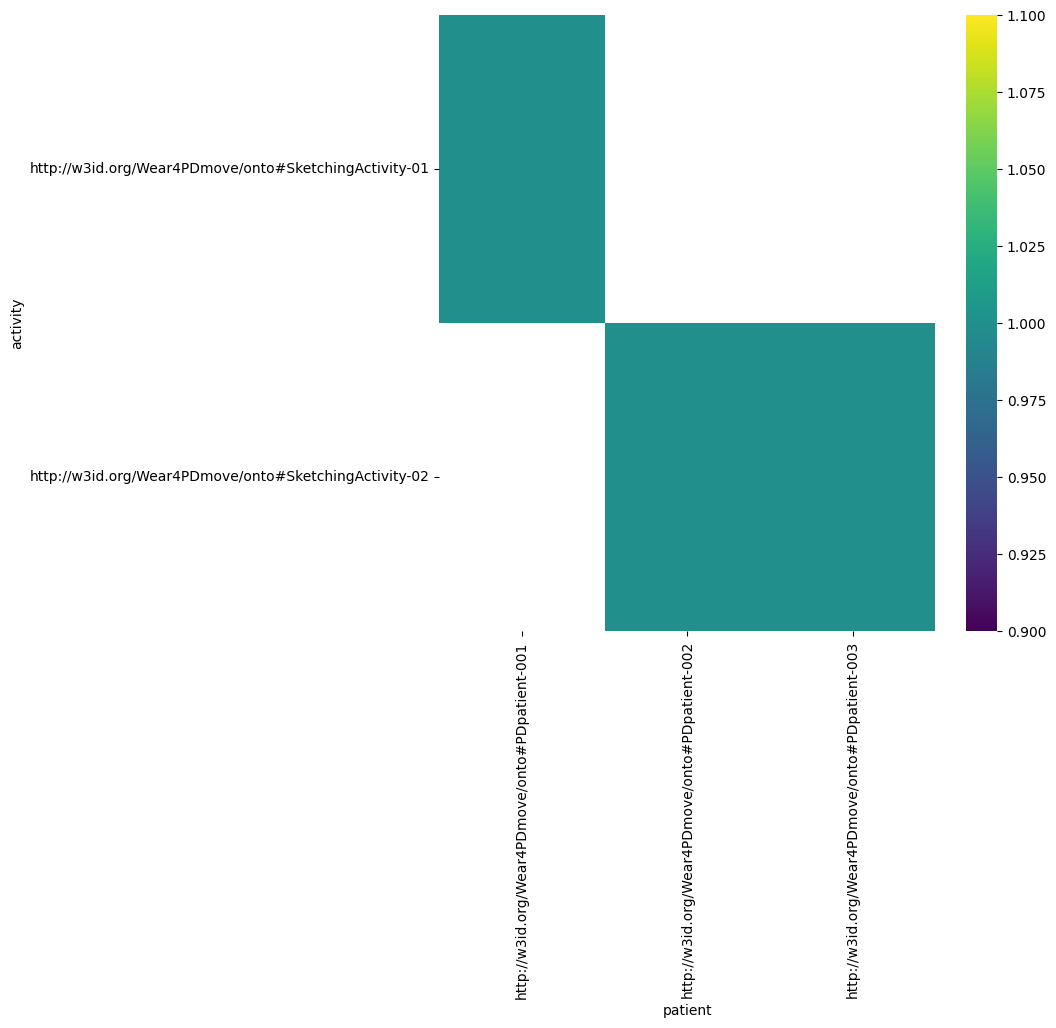

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['activity'].value_counts()
    for x_label, grp in _df_2.groupby('patient')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('patient')
_ = plt.ylabel('activity')